In [76]:
import torch

In [77]:
def activation(x):
    '''sigmoid function
    fornece valores entre 0 e 1 (precisamos para a probabilidade)'''
    return 1/ (1 + torch.exp(-x))

In [78]:
torch.manual_seed(7) 
# se removesse = os números aleatórios gerados por torch.randn e torch.randn_like seriam diferentes em cada execução do código.

features = torch.randn((1, 5)) # bidimensional, 1 linha, 5 colunas.

weights = torch.randn_like(features) #com o mesmo formato de features.

bias = torch.randn((1,1)) #uma variavel apenas.

Calcular a saída da rede neural:

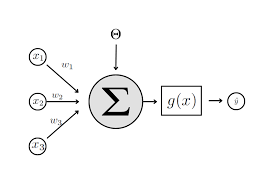

In [79]:
y = activation(torch.sum(features * weights) + bias)
# y = activation((features * weights).sum() + bias)

In [80]:
# A propriedade shape de um tensor em PyTorch retorna uma tupla representando as dimensões do tensor.
 
print(y.shape)
print(weights.shape)
print(features.shape)
print(bias.shape)

torch.Size([1, 1])
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])


In [81]:
# O método reshape é usado para alterar a forma (ou dimensões) de um tensor, desde que o número total de elementos permaneça o mesmo. Ele retorna um novo tensor com a forma especificada.

tensor = torch.randn(2, 3)  # Um tensor 2x3
reshaped_tensor = tensor.reshape(3, 2)  # Redimensiona para 3x2

In [82]:
# O método resize também é usado para alterar a forma de um tensor, mas, ao contrário do reshape, ele modifica o tensor original, se necessário, para acomodar a nova forma. Se a nova forma tiver mais elementos do que o tensor original, ele preenche com zeros.

tensor = torch.randn(2, 3)  # Um tensor 2x3
tensor.resize_(3, 2)  # Redimensiona para 3x2

tensor([[ 0.2028,  2.4505],
        [ 2.0256,  1.7792],
        [-0.9179, -0.4578]])

In [83]:
# O método view é semelhante ao reshape, pois é usado para alterar a forma de um tensor. Ele retorna um novo tensor com a forma especificada, mas compartilha os dados com o tensor original, se possível. Isso significa que as operações no novo tensor podem afetar o tensor original.

tensor = torch.randn(2, 3)  # Um tensor 2x3
viewed_tensor = tensor.view(3, 2)  # Redimensiona para 3x2


 as dimensões das matrizes features e weights não eram compatíveis para a multiplicação de matrizes. features tinha a forma (1, 5) e weights tinha a forma (1, 5), o que significa que a multiplicação de matrizes não era possível diretamente.

 A multiplicação de matrizes dessas duas matrizes resultará em uma matriz de dimensão (1, 1), que é uma saída esperada para uma rede neural com uma única entrada e um único neurônio de saída.

 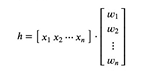

In [84]:
y = activation(torch.mm(features, weights.view(5,1)) + bias)
#metodo de multiplicacao de matrizes é mais eficiente que a soluacao anterior
y

tensor([[0.1595]])

Calcular a saída para a rede multi camadas

In [85]:
torch.manual_seed(7)
features = torch.randn((1,3))

n_input = features.shape[1]
n_hidden = 2
n_output = 1


W1 = torch.randn(n_input, n_hidden)
W2 = torch.randn(n_hidden, n_output)

B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

In [86]:
h = activation(torch.mm(features, W1) + B1)
output = activation(torch.mm(h, W2) + B2)
output

tensor([[0.3171]])

Numpy to Torch and Back

In [87]:
import numpy as np

In [88]:
a = np.random.rand(4,3)
a

array([[0.91720487, 0.16576964, 0.02279269],
       [0.0152984 , 0.57826639, 0.36438456],
       [0.54388301, 0.66193797, 0.25187547],
       [0.25603841, 0.54840748, 0.4623308 ]])

In [89]:
b = torch.from_numpy(a)
b

tensor([[0.9172, 0.1658, 0.0228],
        [0.0153, 0.5783, 0.3644],
        [0.5439, 0.6619, 0.2519],
        [0.2560, 0.5484, 0.4623]], dtype=torch.float64)

In [90]:
b.numpy()

array([[0.91720487, 0.16576964, 0.02279269],
       [0.0152984 , 0.57826639, 0.36438456],
       [0.54388301, 0.66193797, 0.25187547],
       [0.25603841, 0.54840748, 0.4623308 ]])

In [91]:
b.mul_(2)

tensor([[1.8344, 0.3315, 0.0456],
        [0.0306, 1.1565, 0.7288],
        [1.0878, 1.3239, 0.5038],
        [0.5121, 1.0968, 0.9247]], dtype=torch.float64)

In [92]:
a

array([[1.83440974, 0.33153929, 0.04558538],
       [0.03059679, 1.15653279, 0.72876912],
       [1.08776601, 1.32387593, 0.50375094],
       [0.51207683, 1.09681496, 0.92466161]])

Tensors em frameworks de aprendizado de máquina são geralmente otimizados para eficiência em GPU, o que significa que operações matemáticas em tensores podem ser executadas muito mais rapidamente em GPUs do que em CPUs. Isso é crucial para o treinamento eficiente de modelos de aprendizado de máquina em grandes conjuntos de dados.

Arrays em NumPy podem ser usados com GPUs, mas a eficiência pode não ser tão alta quanto com tensores em frameworks de aprendizado de máquina especializados.
